In [1]:
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

c:\Users\manna\anaconda3\envs\tensorflow_env\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


NOW WE WILL PREPROCESS THE TRAINING IMAGES

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'D:\Idea_jam\Plant_Disease_Dataset\Plant_Disease_Dataset\my_train',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

ImportError: cannot import name 'clip_to_image_size' from 'keras.src.layers.preprocessing.image_preprocessing.bounding_boxes.converters' (c:\Users\manna\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\preprocessing\image_preprocessing\bounding_boxes\converters.py)

NOW LETS VALIDATE THE IMAGE PREPROCESSING

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'D:\Idea_jam\Plant_Disease_Dataset\Plant_Disease_Dataset\my_valid',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

ImportError: cannot import name 'clip_to_image_size' from 'keras.src.layers.preprocessing.image_preprocessing.bounding_boxes.converters' (c:\Users\manna\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\preprocessing\image_preprocessing\bounding_boxes\converters.py)

#BUILDING THE MODEL

In [5]:
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [6]:
model = Sequential()

#To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

BUILDING THE CONVOLUTION LAYER

In [7]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [8]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')) #we are increasing the number of filters for better results
model.add(Conv2D(filters=64, kernel_size=3, activation='relu')) #we remove the
model.add(MaxPooling2D(pool_size=2, strides=2))

In [9]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [10]:
#new added convolution layer
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [11]:
#new added convolution layer
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [12]:
#if the model is still not good enough we can add this convolutional layer again
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [13]:
model.add(Dropout(0.25)) #we add this to avoid the over fitting of the training model

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=2048, activation='relu'))

In [16]:
model.add(Dense(units=2048, activation='relu'))

In [17]:
model.add(Dense(units=2048, activation='relu'))

In [18]:
model.add(Dropout(0.2)) #we add this to avoid the over fitting of the training model

In [19]:
#output layer
model.add(Dense(units=38, activation='softmax'))

#Compilling Model

In [20]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [62]:
from tensorflow.keras.utils import plot_model

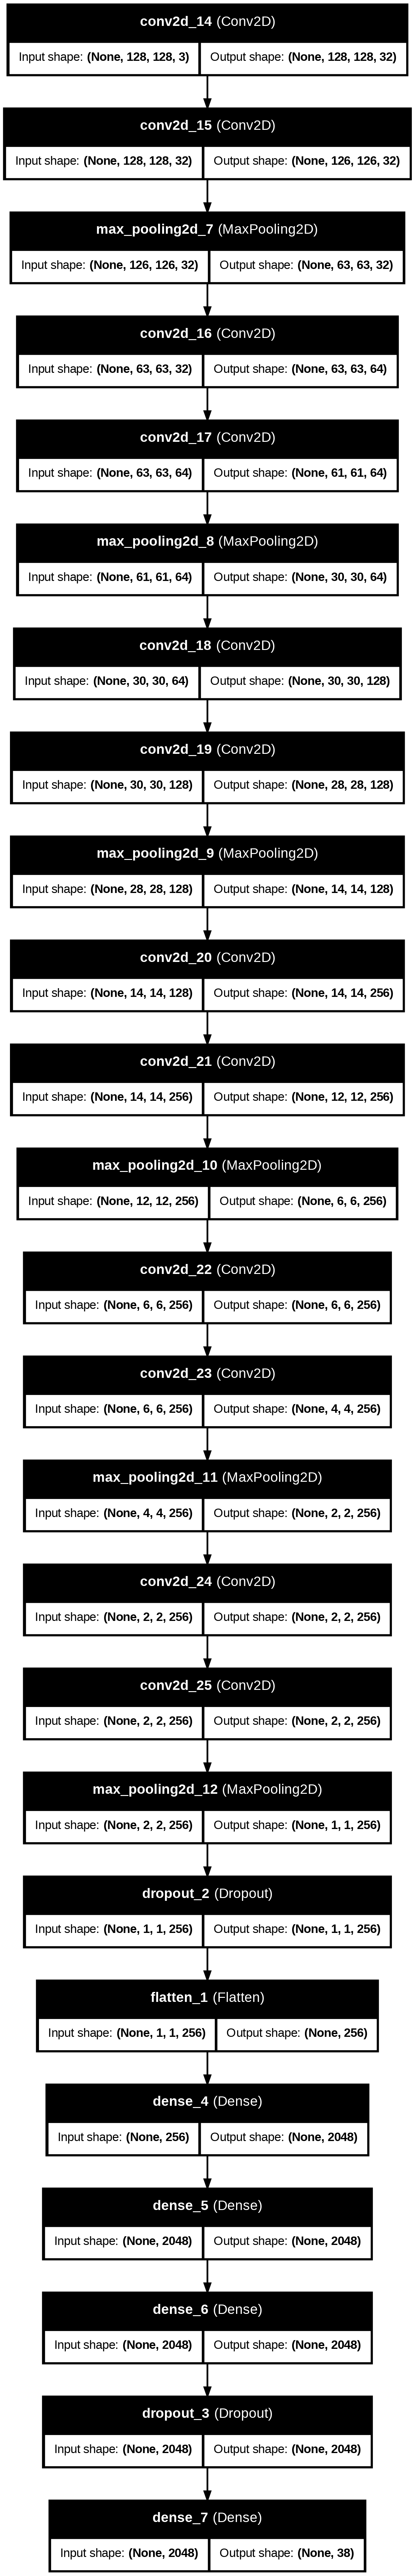

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#Model traning


In [25]:
traning_history = model.fit(x=training_set, epochs=15, validation_data=validation_set)

Epoch 1/15
2197/2197 [==============================] - 363s 165ms/step - loss: 1.7609 - accuracy: 0.4745 - val_loss: 0.7693 - val_accuracy: 0.7569
Epoch 2/15
2197/2197 [==============================] - 359s 163ms/step - loss: 0.6160 - accuracy: 0.8069 - val_loss: 0.4129 - val_accuracy: 0.8663
Epoch 3/15
2197/2197 [==============================] - 350s 159ms/step - loss: 0.3551 - accuracy: 0.8887 - val_loss: 0.2735 - val_accuracy: 0.9120
Epoch 4/15
2197/2197 [==============================] - 361s 164ms/step - loss: 0.2445 - accuracy: 0.9228 - val_loss: 0.2494 - val_accuracy: 0.9221
Epoch 5/15
2197/2197 [==============================] - 350s 159ms/step - loss: 0.1868 - accuracy: 0.9409 - val_loss: 0.2633 - val_accuracy: 0.9183
Epoch 6/15
2197/2197 [==============================] - 351s 160ms/step - loss: 0.1424 - accuracy: 0.9548 - val_loss: 0.1969 - val_accuracy: 0.9384
Epoch 7/15
2197/2197 [==============================] - 357s 163ms/step - loss: 0.1170 - accuracy: 0.9636 - val_

## Evaluating Model

In [26]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc ,'Training loss:', train_loss)

2197/2197 [==============================] - 177s 80ms/step - loss: 0.0586 - accuracy: 0.9831
Training accuracy: 0.9830713272094727 Training loss: 0.058564603328704834


In [27]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc, 'Validation loss:', val_loss)

550/550 [==============================] - 25s 45ms/step - loss: 0.2108 - accuracy: 0.9499
Validation accuracy: 0.9498634338378906 Validation loss: 0.21082161366939545


### Saving Model

In [29]:
model.save('plant_disease_model.keras')

In [ ]:
traning_history.history #Return Dictionary of history

In [30]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(traning_history.history,f)

In [31]:
print(traning_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

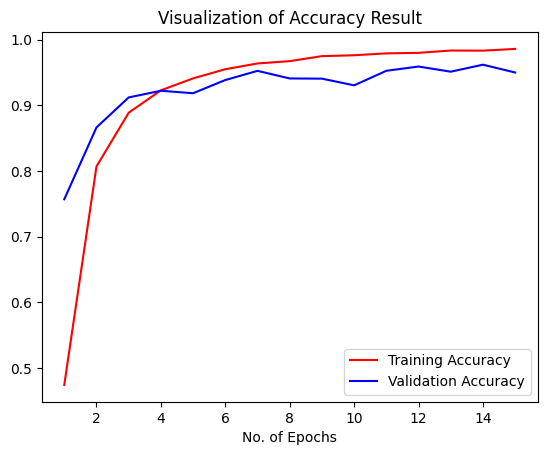

In [33]:
epochs = [i for i in range(1,16)]
plt.plot(epochs,traning_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,traning_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [34]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [43]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'D:\Idea_jam\Plant_Disease_Dataset\Plant_Disease_Dataset\my_valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [44]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

17572/17572 [==============================] - 123s 7ms/step


(array([[1.00000000e+00, 6.00588607e-11, 9.44392202e-14, ...,
         5.23724881e-22, 1.41158620e-17, 2.41454683e-15],
        [1.00000000e+00, 7.67029495e-12, 4.53688383e-17, ...,
         1.70061956e-26, 1.91880156e-19, 1.26732735e-18],
        [1.00000000e+00, 1.08731548e-11, 5.02925135e-14, ...,
         4.80517897e-23, 4.64105234e-18, 6.87050764e-16],
        ...,
        [1.01945414e-04, 6.67942288e-08, 6.22938533e-05, ...,
         4.94215158e-07, 8.45472314e-05, 9.90950167e-01],
        [2.41792918e-06, 3.34882122e-10, 1.55542591e-06, ...,
         3.23487570e-09, 4.46624290e-06, 9.99125898e-01],
        [9.94113520e-07, 3.30309113e-10, 9.19649381e-07, ...,
         1.75919823e-09, 3.75780041e-06, 9.99160647e-01]], dtype=float32),
 (17572, 38))

In [45]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [46]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [47]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [48]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [49]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.95      0.95       504
                                 Apple___Black_rot       0.93      0.99      0.96       497
                          Apple___Cedar_apple_rust       0.97      0.91      0.94       440
                                   Apple___healthy       0.92      0.96      0.94       502
                               Blueberry___healthy       0.98      0.97      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.94      0.97       421
                 Cherry_(including_sour)___healthy       1.00      0.94      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.87      0.91       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.96      0.

### Confusion Matrix Visualization

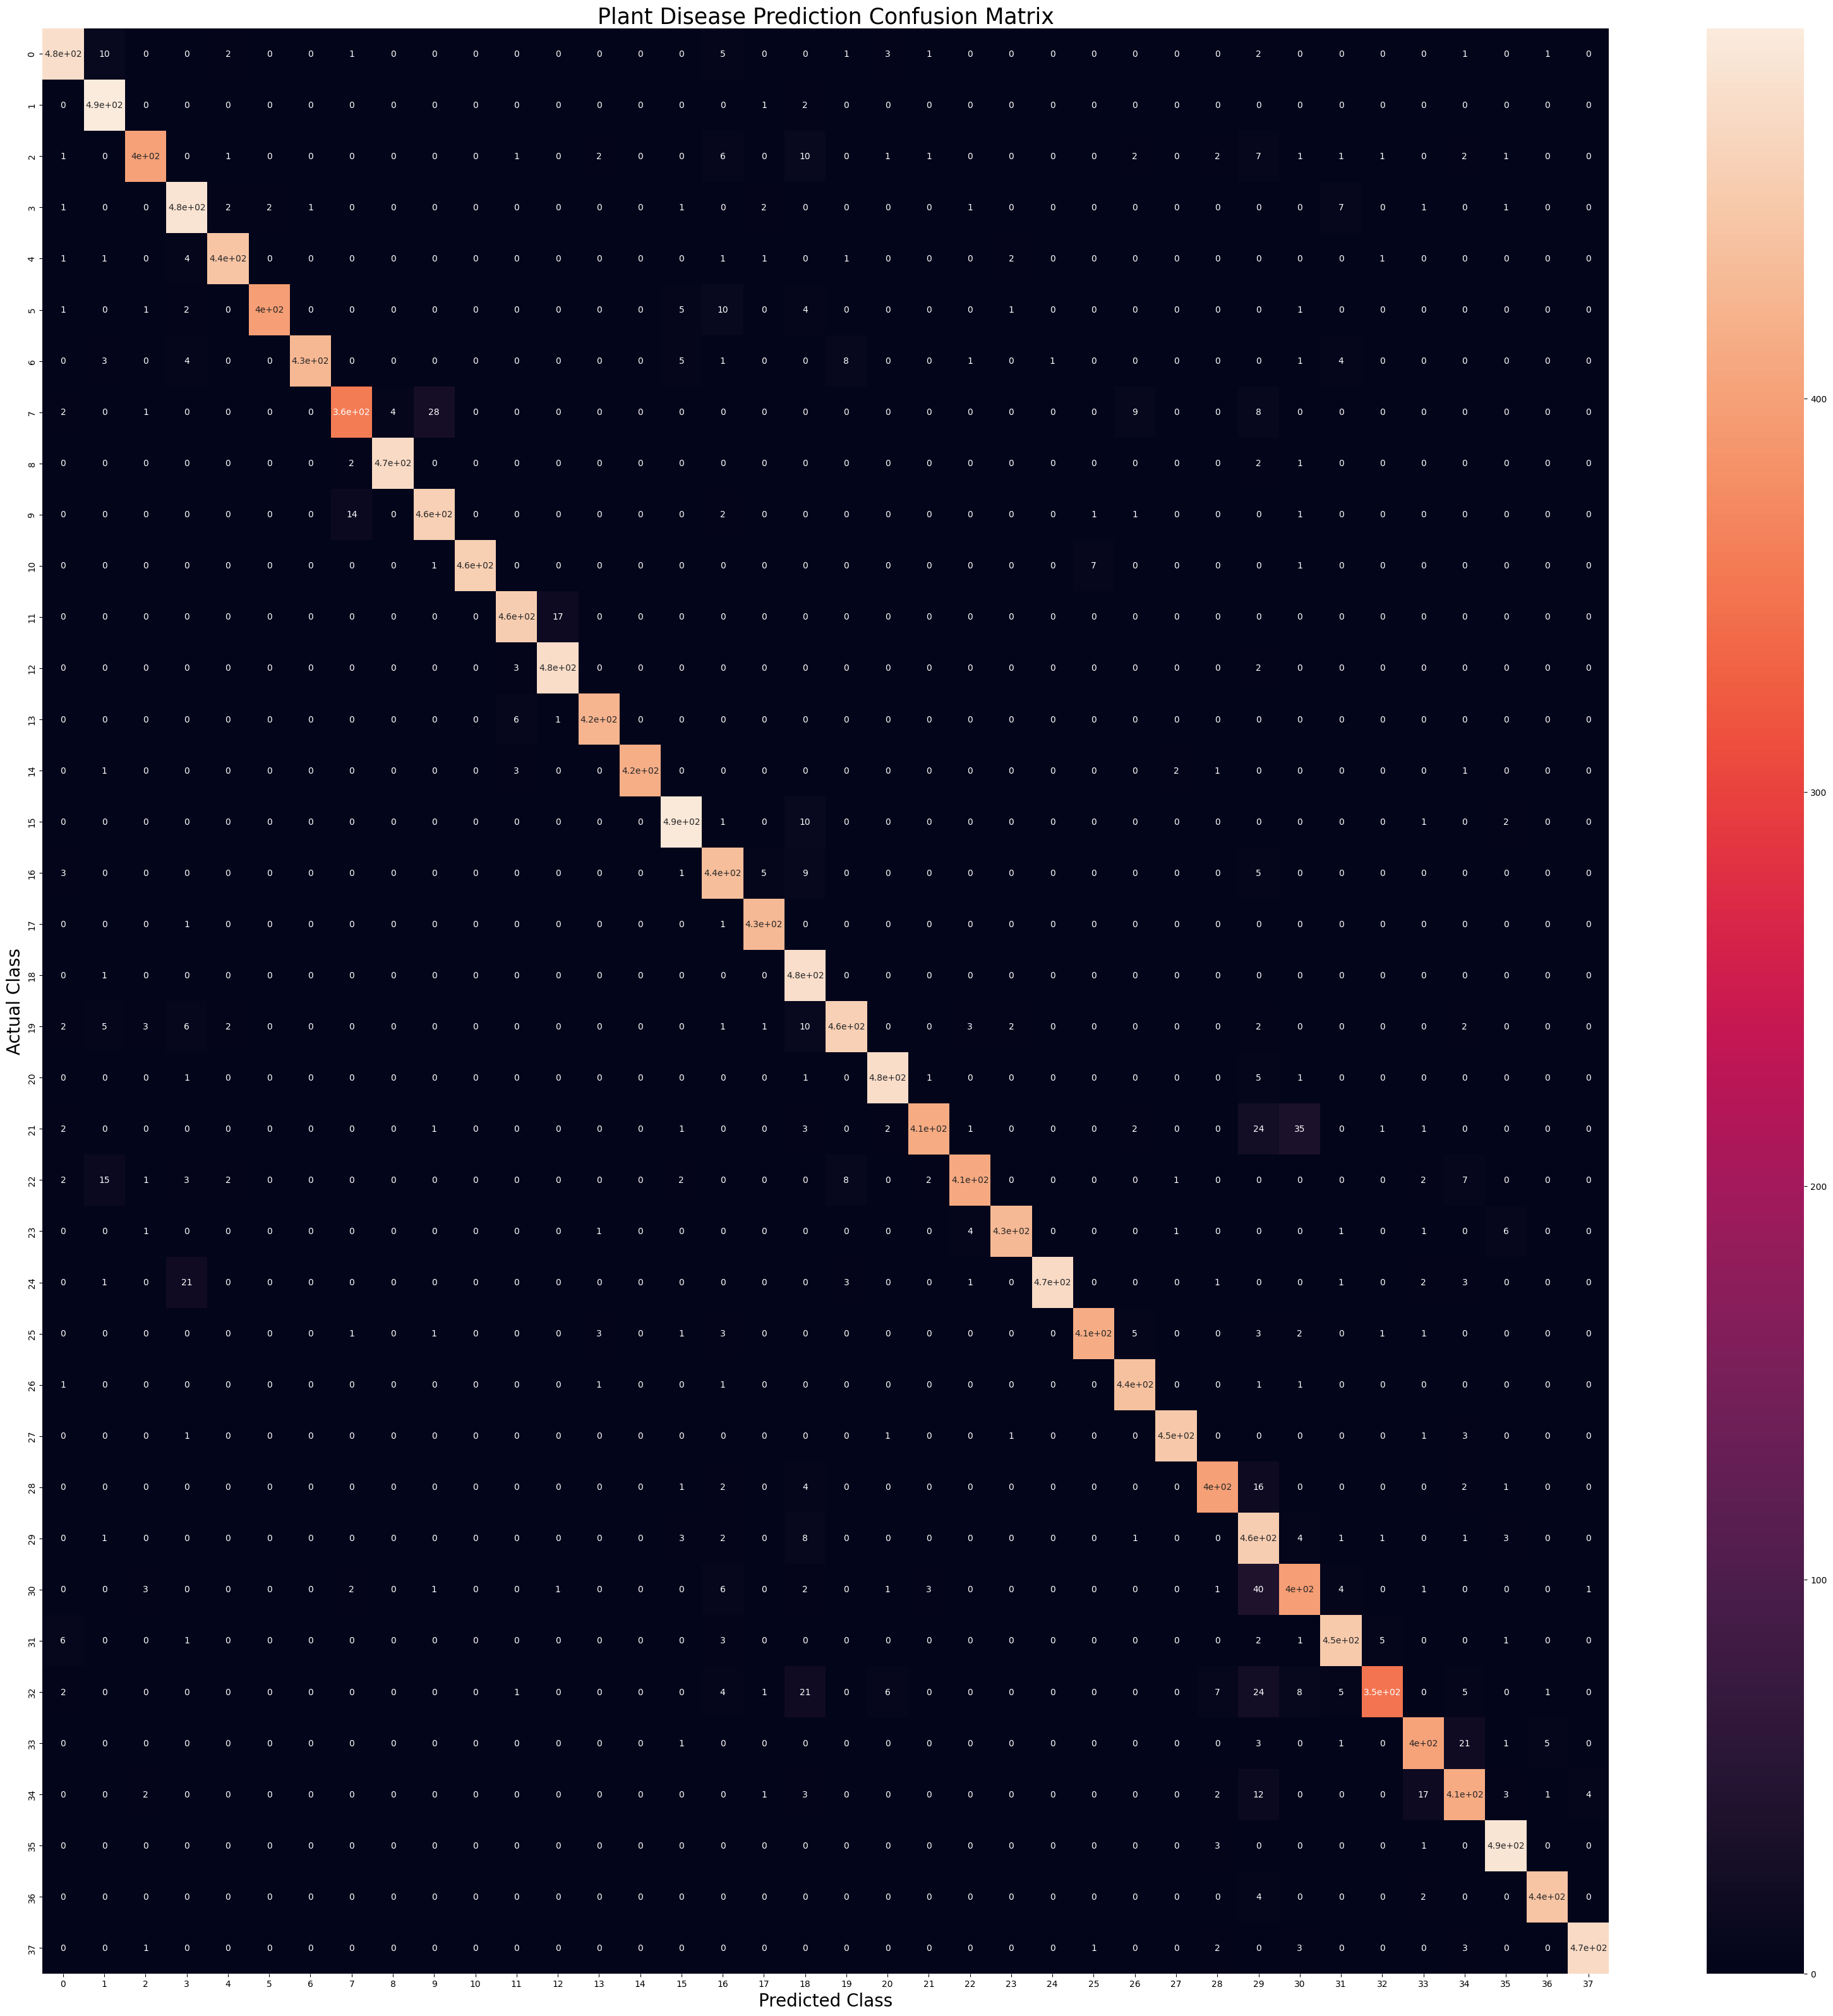

In [50]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [52]:
model.save('trained_plant_disease_model new.keras')